In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as sc

In [2]:
pl_fluence = pd.read_table('pl_energy_fluence.txt', sep ='|')
pl_fluence = pl_fluence.drop(columns = [' Trig_ID ', ' 15_25kev ', ' 15_25kev_low ',
       ' 15_25kev_hi ', ' 100_150kev ',
       ' 100_150kev_low ', ' 100_150kev_hi ', ' 100_350kev ',
       ' 100_350kev_low ', ' 100_350kev_hi ', ' 15_150kev ', ' 15_150kev_low ',
       ' 15_150kev_hi ', ' 15_350kev ', ' 15_350kev_low ', ' 15_350kev_hi ',
       ' Exposure_time ', ' Spectrum_start ', ' Spectrum_stop ', ' comment'])
pl_fluence = pl_fluence.rename(columns=lambda x: x.strip())
pl_fluence['GRB Name'] = pl_fluence['GRB Name'].str.strip()

In [3]:
cpl_fluence = pd.read_table('cpl_energy_fluence.txt', sep ='|')
cpl_fluence = cpl_fluence.drop(columns = [' Trig_ID ', ' 15_25kev ', ' 15_25kev_low ',
       ' 15_25kev_hi ', ' 100_150kev ',
       ' 100_150kev_low ', ' 100_150kev_hi ', ' 100_350kev ',
       ' 100_350kev_low ', ' 100_350kev_hi ', ' 15_150kev ', ' 15_150kev_low ',
       ' 15_150kev_hi ', ' 15_350kev ', ' 15_350kev_low ', ' 15_350kev_hi ',
       ' Exposure_time ', ' Spectrum_start ', ' Spectrum_stop ', ' comment'])
cpl_fluence = cpl_fluence.rename(columns=lambda x: x.strip())
cpl_fluence['GRB Name'] = cpl_fluence['GRB Name'].str.strip()

In [4]:
cpl = pd.read_csv('cpl.csv')
pl = pd.read_csv('pl.csv')

In [5]:
cpl_hr = pd.merge(cpl, cpl_fluence)
pl_hr = pd.merge(pl, pl_fluence)

In [6]:
# format columns as floats
cpl_hr = cpl_hr.astype({'25_50kev':"float64", '25_50kev_low':'float64', '25_50kev_hi':"float64", 
                        '50_100kev':"float64", '50_100kev_low':"float64", '50_100kev_hi':"float64"})
pl_hr = pl_hr.astype({'25_50kev':"float64", '25_50kev_low':'float64', '25_50kev_hi':"float64", 
                        '50_100kev':"float64", '50_100kev_low':"float64", '50_100kev_hi':"float64"})

In [7]:
pl_hr['Hardness Ratio'] = pl_hr['50_100kev']/pl_hr['25_50kev']
cpl_hr['Hardness Ratio'] = cpl_hr['50_100kev']/cpl_hr['25_50kev']

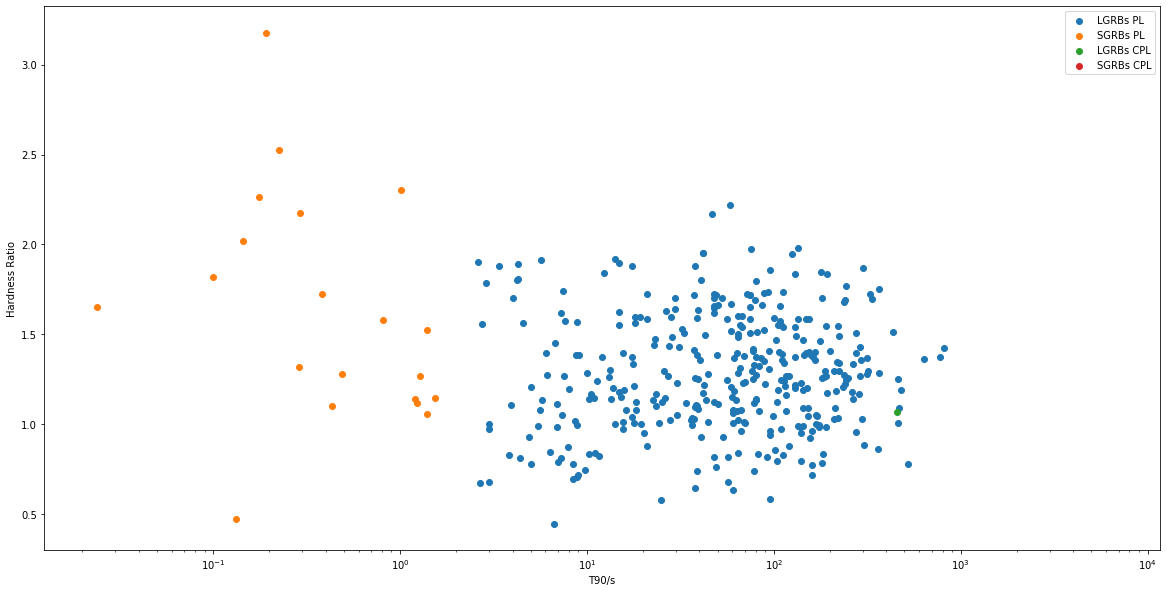

In [13]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')

LGRBs_pl = pl_hr.loc[(pl_hr['T90']> 2)]
SGRBs_pl = pl_hr.loc[(pl_hr['T90']< 2)]
plt.scatter(LGRBs_pl['T90'], LGRBs_pl['Hardness Ratio'])
plt.scatter(SGRBs_pl['T90'], SGRBs_pl['Hardness Ratio'])

LGRBs_cpl = cpl_hr.loc[(cpl_hr['T90']> 2)]
SGRBs_cpl = cpl_hr.loc[(cpl_hr['T90']< 2)]
plt.scatter(LGRBs_cpl['T90'], LGRBs_cpl['Hardness Ratio'])
plt.scatter(SGRBs_cpl['T90'], SGRBs_cpl['Hardness Ratio'])

plt.legend(['LGRBs PL', 'SGRBs PL','LGRBs CPL', 'SGRBs CPL'])
plt.xlabel('T90/s')
plt.ylabel('Hardness Ratio')
plt.show()

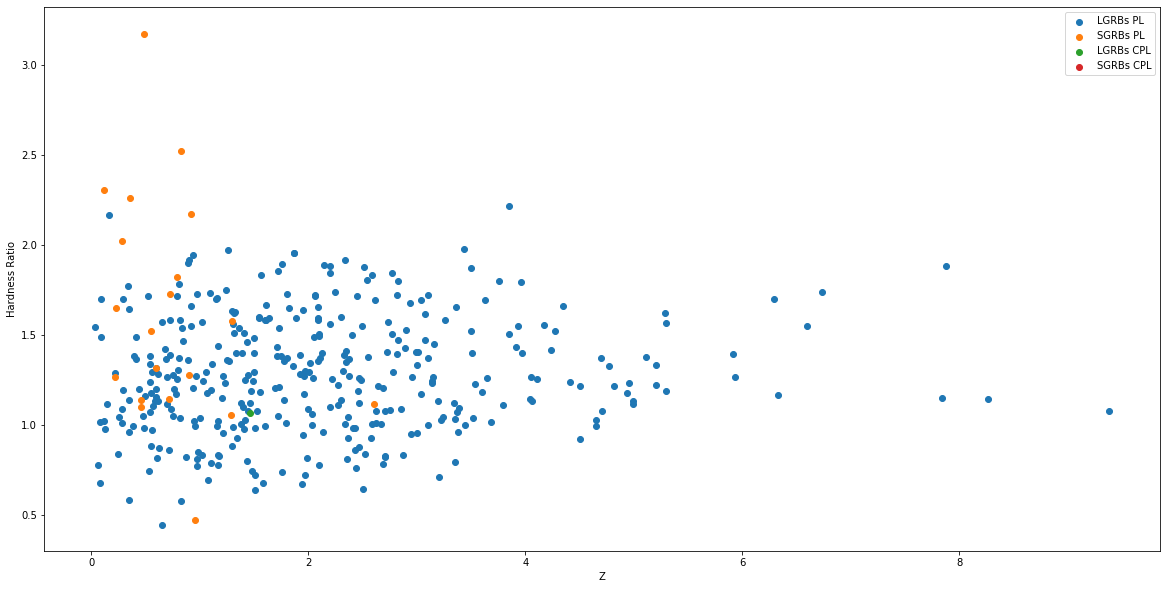

In [20]:
plt.figure(figsize=(20,10)) #sets figure size

LGRBs_pl = pl_hr.loc[(pl_hr['T90']> 2)]
SGRBs_pl = pl_hr.loc[(pl_hr['T90']< 2)]
plt.scatter(LGRBs_pl['z'], LGRBs_pl['Hardness Ratio'])
plt.scatter(SGRBs_pl['z'], SGRBs_pl['Hardness Ratio'])

LGRBs_cpl = cpl_hr.loc[(cpl_hr['T90']> 2)]
SGRBs_cpl = cpl_hr.loc[(cpl_hr['T90']< 2)]
plt.scatter(LGRBs_cpl['z'], LGRBs_cpl['Hardness Ratio'])
plt.scatter(SGRBs_cpl['z'], SGRBs_cpl['Hardness Ratio'])

plt.legend(['LGRBs PL', 'SGRBs PL','LGRBs CPL', 'SGRBs CPL'])
plt.xlabel('Z')
plt.ylabel('Hardness Ratio')
plt.show()


In [19]:
LGRBs_lowz = pl_hr.loc[(pl_hr['T90']> 2) & (pl_hr['z'] < 1)]
SGRBs_lowz = pl_hr.loc[(pl_hr['T90']< 2) & (pl_hr['z']< 1)]

print (np.mean(LGRBs_lowz['Hardness Ratio']), np.mean(SGRBs_lowz['Hardness Ratio']))

1.232982533306943 1.700448501303117


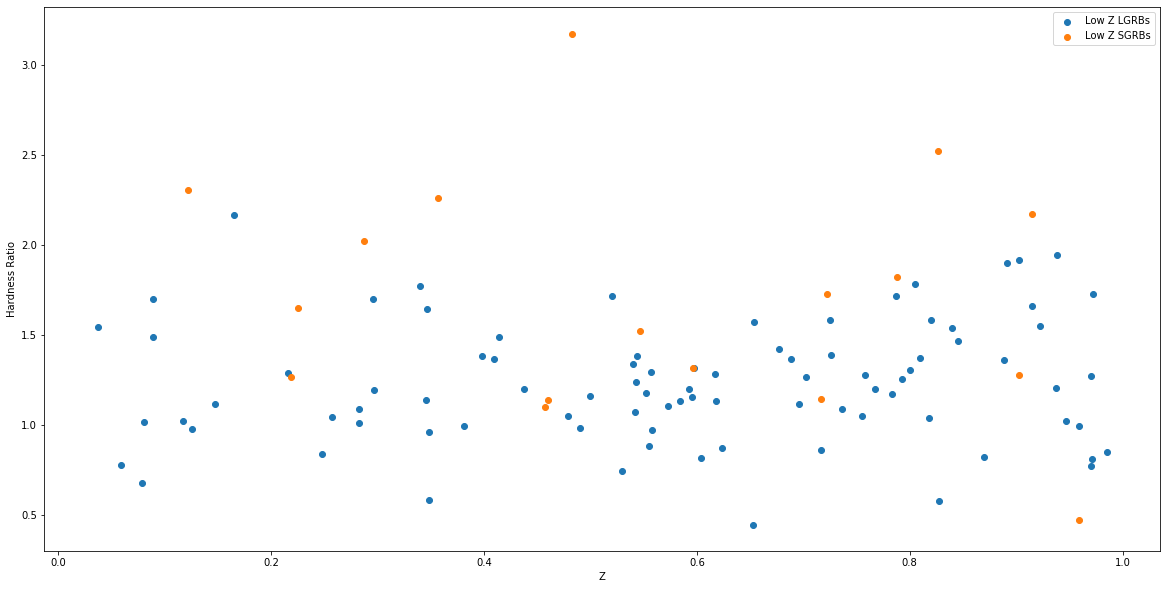

In [18]:
plt.figure(figsize=(20,10)) #sets figure size

LGRBs_lowz = pl_hr.loc[(pl_hr['T90']> 2) & (pl_hr['z'] < 1)]
SGRBs_lowz = pl_hr.loc[(pl_hr['T90']< 2) & (pl_hr['z']< 1)]

plt.scatter(LGRBs_lowz['z'], LGRBs_lowz['Hardness Ratio'])
plt.scatter(SGRBs_lowz['z'], SGRBs_lowz['Hardness Ratio'])
plt.legend(['Low Z LGRBs', 'Low Z SGRBs'])
plt.xlabel('Z')
plt.ylabel('Hardness Ratio')
plt.show()